In [22]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2024-01-08 06:20:12--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   185MB/s    in 0.4s    

2024-01-08 06:20:13 (185 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [ ]:
import zipfile

#unzip and archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
import os

base_dir = '/content/cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of test directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['validation', 'vectorize.py', 'train']

Contents of train directory:
['cats', 'dogs']

Contents of test directory:
['cats', 'dogs']


In [ ]:
import os

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

#Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#Directory with validation cat/dog pictures
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.43.jpg', 'cat.651.jpg', 'cat.89.jpg', 'cat.324.jpg', 'cat.997.jpg', 'cat.756.jpg', 'cat.71.jpg', 'cat.688.jpg', 'cat.842.jpg', 'cat.973.jpg']
['dog.445.jpg', 'dog.673.jpg', 'dog.1.jpg', 'dog.685.jpg', 'dog.591.jpg', 'dog.576.jpg', 'dog.865.jpg', 'dog.635.jpg', 'dog.589.jpg', 'dog.976.jpg']


In [ ]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( val_cats_dir ) ))
print('total validation dog images :', len(os.listdir( val_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#parameters for out graphs
nrows = 4
ncols =4
pic_index = 0 # index for iterating over images

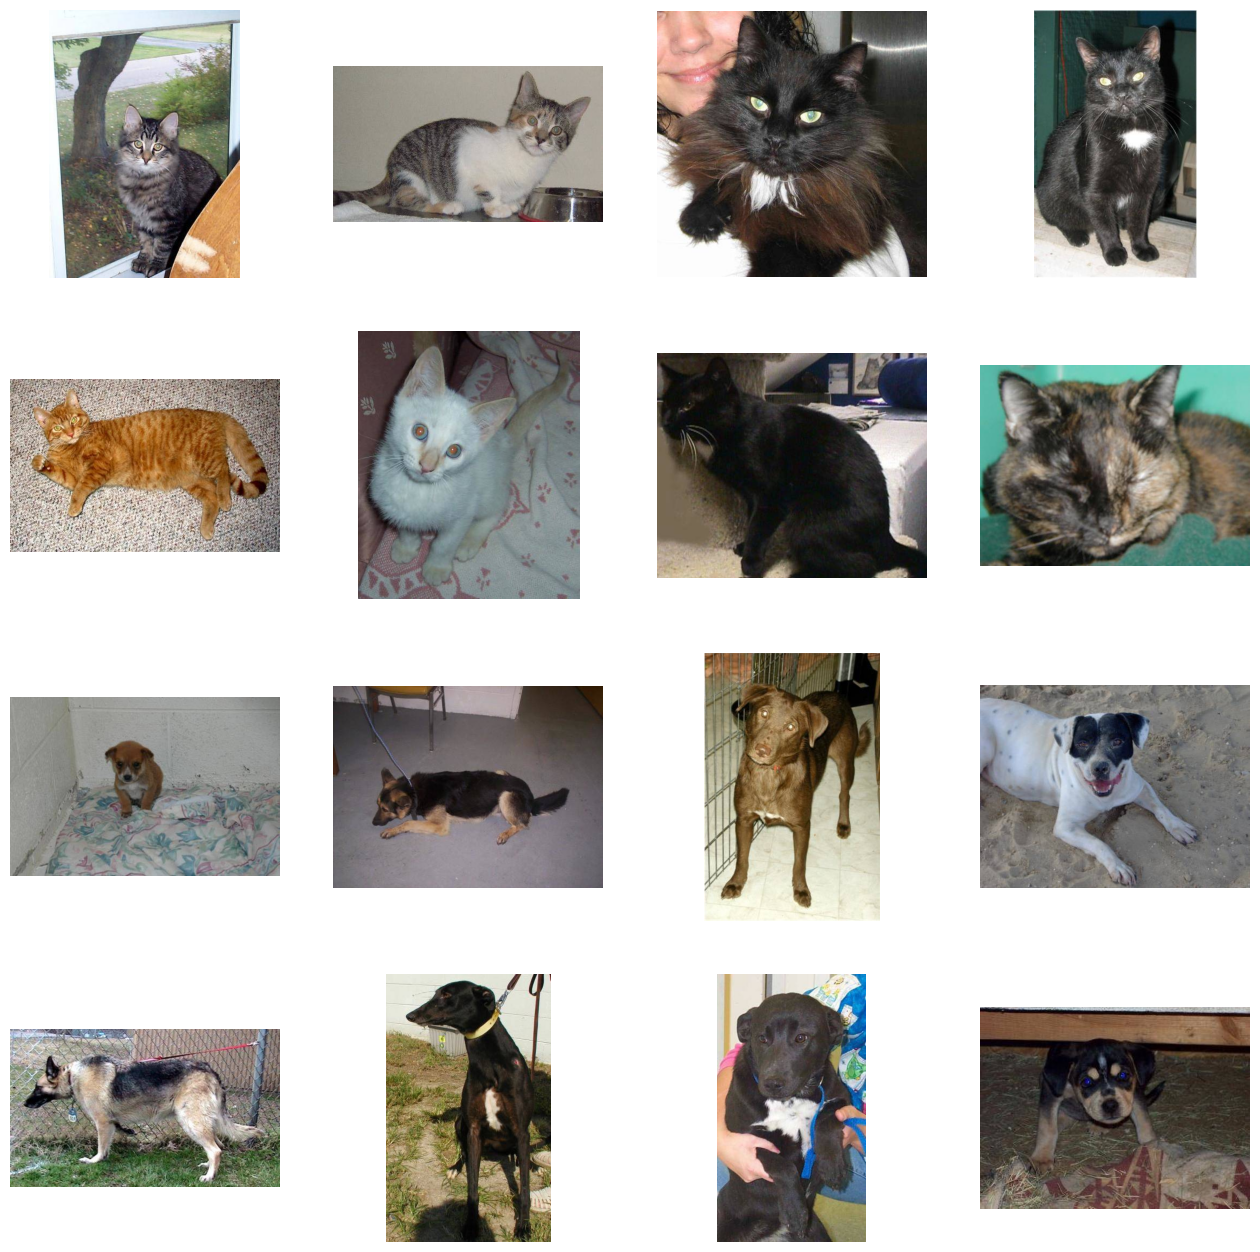

In [ ]:
fig = plt.gcf() # gcf = get current figure
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
               for fname in train_cat_fnames[pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
               for fname in train_dog_fnames[pic_index-8:pic_index]
                ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  #set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis("Off") # Don't show axes (or gridless)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    #Note that input shape is the desired size of 150x150x3 of 3 different colors
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    #Flatten the results to feed into DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate = 0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#All images will be Re-scaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150))

# Flow training images in batches of 20 using val_datagen generator
validation_generator =test_datagen.flow_from_directory(val_dir,
                                                batch_size=20,
                                                class_mode='binary',
                                                target_size=(150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs=15,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2
)

Epoch 1/15
100/100 - 67s - loss: 0.6903 - accuracy: 0.5655 - val_loss: 0.6630 - val_accuracy: 0.5430 - 67s/epoch - 671ms/step
Epoch 2/15
100/100 - 69s - loss: 0.6428 - accuracy: 0.6260 - val_loss: 0.5819 - val_accuracy: 0.7110 - 69s/epoch - 686ms/step
Epoch 3/15
100/100 - 63s - loss: 0.5736 - accuracy: 0.6955 - val_loss: 0.5667 - val_accuracy: 0.6980 - 63s/epoch - 627ms/step
Epoch 4/15
100/100 - 67s - loss: 0.5212 - accuracy: 0.7430 - val_loss: 0.5688 - val_accuracy: 0.6960 - 67s/epoch - 670ms/step
Epoch 5/15
100/100 - 66s - loss: 0.4737 - accuracy: 0.7725 - val_loss: 0.5787 - val_accuracy: 0.7060 - 66s/epoch - 661ms/step
Epoch 6/15
100/100 - 60s - loss: 0.4073 - accuracy: 0.8090 - val_loss: 0.5669 - val_accuracy: 0.7150 - 60s/epoch - 600ms/step
Epoch 7/15
100/100 - 82s - loss: 0.3314 - accuracy: 0.8545 - val_loss: 0.6136 - val_accuracy: 0.7190 - 82s/epoch - 816ms/step
Epoch 8/15
100/100 - 87s - loss: 0.2452 - accuracy: 0.8970 - val_loss: 0.7848 - val_accuracy: 0.7030 - 87s/epoch - 868

In [ ]:
# Model Prediction

import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = '/content/' + fn
  img=image.load_img(path, target_size=(150,150))

  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn+" is a dog")
  else:
    print(fn+" is a cat")

Saving 53d0b9624b9e0b28709cf1d0ae59586b.webp to 53d0b9624b9e0b28709cf1d0ae59586b.webp
1/1 [==============================] - 0s 27ms/step
[0.11948258]
53d0b9624b9e0b28709cf1d0ae59586b.webp is a cat


1/1 [==============================] - 0s 97ms/step


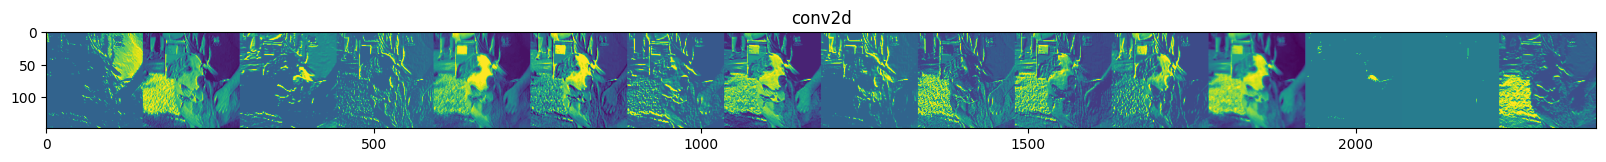

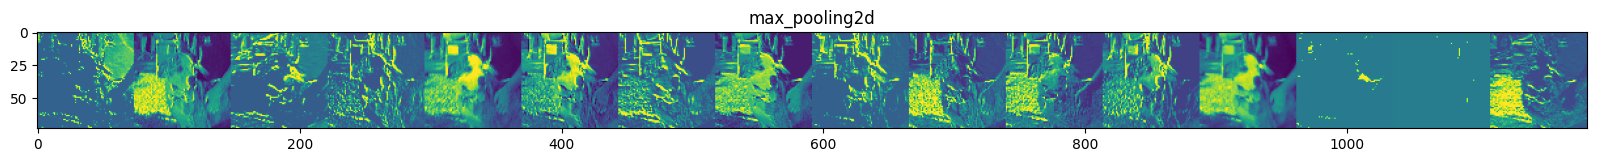

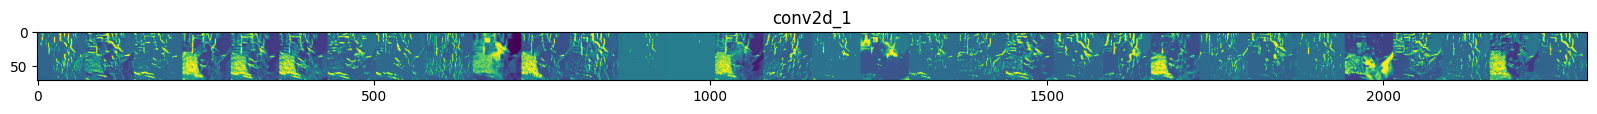

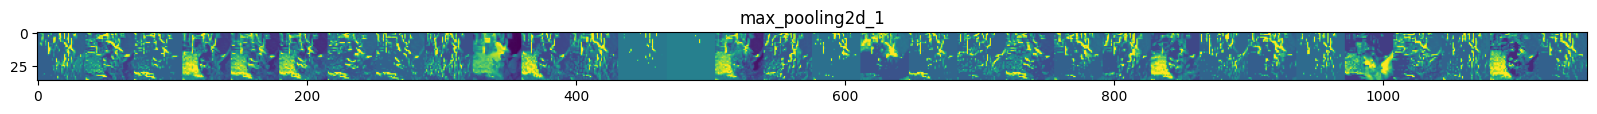

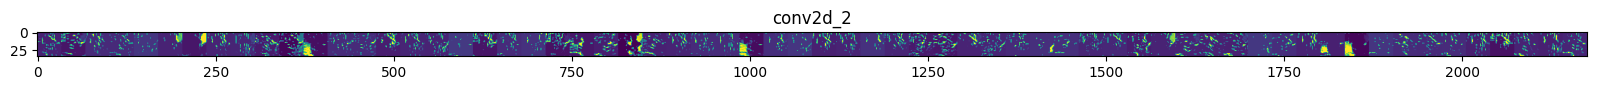

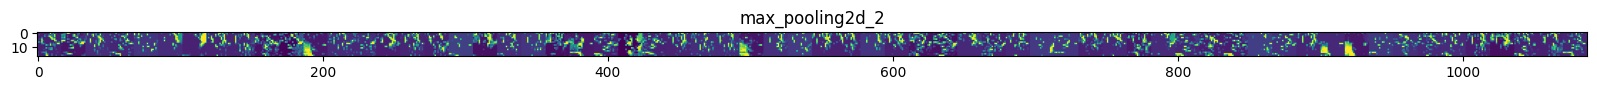

In [25]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:

    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))

    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

Text(0.5, 1.0, 'Training and validation loss')

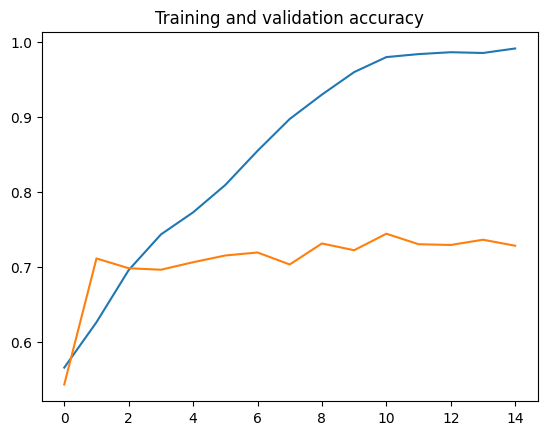

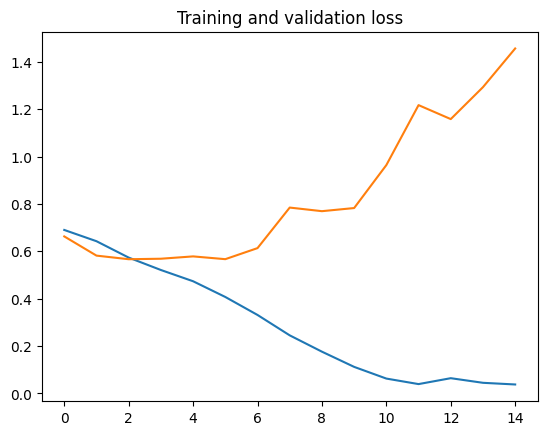

In [26]:
# Evaluating Accuracy and Loss for the Model

# Retrieve a list of list results on training and test data
# sets for each training epoch

acc = history.history[ 'accuracy' ]
val_acc = history.history[ 'val_accuracy' ]
loss = history.history[ 'loss' ]
val_loss = history.history[ 'val_loss' ]

epochs = range(len(acc)) # Get no.of epochs

# Plot the training and validation per epoch

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

# Plot Training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')